# 나랑 닮은 연예인을 찾아보자
-----------------------

## Step1. 사진 모으기

### 1. 내 사진 찍기

* 내 사진을 2장 이상 포함합시다.
* 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
* 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

[(116, 270, 270, 115)]


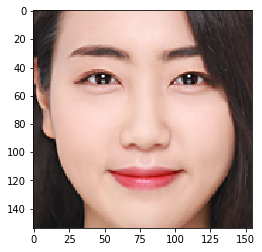

In [9]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding2/images/lina.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]


    
plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [23]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[ a : c, d : b, : ]
    
    return cropped_face

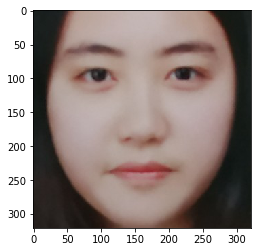

In [25]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding2/images/kim2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [59]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding2/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['kim2.jpg', 'kim.jpg', 'lina.jpg']


In [60]:
image_file = os.path.join(dir_path, 'kim.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.09952532,  0.00110077,  0.06202664, -0.12226056, -0.10030094,
        -0.04642611, -0.06692551, -0.08805921,  0.12383632, -0.17466085,
         0.19343708, -0.12933028, -0.18935214, -0.02037069, -0.05887786,
         0.18130036, -0.15864101, -0.07201366, -0.0373283 ,  0.0272706 ,
         0.09122135,  0.00772817, -0.02171011,  0.02942948, -0.1168181 ,
        -0.33014461, -0.14344674, -0.04366783, -0.02626579, -0.04624012,
        -0.07402695,  0.02935105, -0.14592969, -0.02435447, -0.01829999,
         0.07526083, -0.02237071, -0.08650116,  0.1057414 ,  0.02372032,
        -0.25617766,  0.03519693,  0.03733409,  0.21817434,  0.21884276,
         0.03647194,  0.02032585, -0.13271298,  0.135506  , -0.20029356,
        -0.00100113,  0.09485289,  0.01354287,  0.06193977,  0.03212468,
        -0.06722264,  0.05454643,  0.16315559, -0.10962922,  0.04697924,
         0.11214795, -0.0537091 , -0.00725744, -0.08125976,  0.21253042,
         0.06823128, -0.15102354, -0.14923614,  0.1

In [61]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
        
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]# [[YOUR CODE]]
        
    return embedding_dict

In [62]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['lina']

array([-0.09998492,  0.02740047,  0.06228995, -0.09465573, -0.11928301,
       -0.03869556, -0.09837818, -0.10912773,  0.12074187, -0.17846915,
        0.14008074, -0.09374171, -0.1795267 , -0.01357952, -0.05767915,
        0.1901962 , -0.13789368, -0.13266085, -0.01328698,  0.03172313,
        0.05486402,  0.04296319, -0.00818876,  0.03587322, -0.14518273,
       -0.29902008, -0.15102871, -0.02935784, -0.07633551, -0.0554187 ,
       -0.04420647,  0.02538168, -0.14598879,  0.00985815, -0.00119695,
        0.0666004 , -0.0250749 , -0.11176576,  0.13400003,  0.00863352,
       -0.27607766,  0.03238902,  0.0692869 ,  0.23494425,  0.20921685,
        0.00453019, -0.00748049, -0.13400795,  0.11658142, -0.16933315,
       -0.01592625,  0.11898643,  0.01818622,  0.0641992 ,  0.00961131,
       -0.05616929,  0.07518771,  0.13714589, -0.09770903,  0.00310829,
        0.0671451 , -0.04754113,  0.00736285, -0.0652485 ,  0.23180965,
        0.05177664, -0.12796043, -0.16231309,  0.14007802, -0.14

In [63]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('lina', 'kim')

0.2817479236318387

In [64]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('lina')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [65]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('lina',
  array([-0.09998492,  0.02740047,  0.06228995, -0.09465573, -0.11928301,
         -0.03869556, -0.09837818, -0.10912773,  0.12074187, -0.17846915,
          0.14008074, -0.09374171, -0.1795267 , -0.01357952, -0.05767915,
          0.1901962 , -0.13789368, -0.13266085, -0.01328698,  0.03172313,
          0.05486402,  0.04296319, -0.00818876,  0.03587322, -0.14518273,
         -0.29902008, -0.15102871, -0.02935784, -0.07633551, -0.0554187 ,
         -0.04420647,  0.02538168, -0.14598879,  0.00985815, -0.00119695,
          0.0666004 , -0.0250749 , -0.11176576,  0.13400003,  0.00863352,
         -0.27607766,  0.03238902,  0.0692869 ,  0.23494425,  0.20921685,
          0.00453019, -0.00748049, -0.13400795,  0.11658142, -0.16933315,
         -0.01592625,  0.11898643,  0.01818622,  0.0641992 ,  0.00961131,
         -0.05616929,  0.07518771,  0.13714589, -0.09770903,  0.00310829,
          0.0671451 , -0.04754113,  0.00736285, -0.0652485 ,  0.23180965,
          0.05177664, -0.127

In [66]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
  
    for i in range(top+1):
        if i == 0:
            continue
    if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))# [[YOUR CODE]]

내 사진들간의 거리는 0.2817479236318387로 가까운 편인듯 하다.

### 2. 비교할 연예인 사진 모으기

In [67]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding2/data/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['여자아이들수진.jpeg', '김대중.jpg', '이재용.jpg', '박정민.jpg', '박건우.png', '차명석.jpg', '이영하.jpg', '레인보우재경.jpg', '케이.jpg', '주진모(올드).jpg', '송중기.jpeg', '이동국.jpeg', '최준석.jpg', '김대명.jpeg', '박항서.jpg', '트와이스정연.jpg', '김고은.jpeg', '슈퍼비.jpeg', '차범근.jpeg', '이정재.jpeg', '디오.jpeg', '박찬호.jpg', '김종서.jpg', '이명박.jpg', '박명수.jpg', '정민철.jpg', '비니.jpg', '잭 스페이더.jpeg', '딕헌터.jpeg', '하승진.jpg', '장동건.jpeg', '윤종신.jpeg', '이근대위.jpeg', '트와이스사나.jpg', '성룡.jpg', '공유.jpg', '방시혁.jpeg', '승희.jpeg', '이안 굿펠로우.jpg', '우기.jpg', '러블리즈지수.jpeg', '고창석.jpeg', '정우성.jpeg', '잭 갤리퍼내키스.jpg', '이희준.jpg', '도아.jpeg', '기성용.jpg', '이진호.jpeg', '제이크 질렌할.jpeg', 'bush.jpeg', '이연걸.jpeg', '카이.jpg', '전소미.jpg', '박재범.jpg', '이말년.png', '존 파브르.jpeg', '박용택.jpg', '윤균상.jpg', '류진.jpg', '아이즈원민주.jpg', '티모시 달튼.jpeg', '조원희.jpg', '세훈.jpg', '리사.jpg', '류승범.jpg', '아이린.jpeg', '유아.jpg', '로저 무어.jpeg', '황정민.jpg', '유희열.jpeg', '효정.jpg', '켄 정.jpeg', '태양.jpeg', '유지태.jpg', '아이유.jpg', '진.jpg', '돈스파이크.jpg', '심수창.jpeg', '스윙스.jpeg', '유노윤호.jpg', '수호.jpg', '태연.jpg', '정형돈.jpg', '문재인.jpeg'

## Step2. 얼굴 영역 자르기

In [1]:
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)

In [70]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[ a : c, d : b, : ]
    
    return cropped_face

## Step3. 얼굴 영역의 임베딩 추출하기

* def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [71]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
        
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]# [[YOUR CODE]]
        
    return embedding_dict

## Step4. 모은 연예인들과 비교하기

In [72]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
  
    for i in range(top+1):
        if i == 0:
            continue
    if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))# [[YOUR CODE]]

## Step5. 다양한 재미있는 시각화 시도해 보기

## 회고

사진 사이즈 잡는 것을 계속 실패했다.   
slack에 있는 해결법을 참고해 봤지만 계속 에러가 났다.   
아직 수련이 부족한 듯 하다.    
정답 나오고 확인 후 비교 해봐야겠다.